In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
fighters = pd.read_csv("data/fighter-database.csv")
fights = pd.read_csv("draft-data/fights1.csv")

In [50]:
fighters.head(5)

,id,name,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo
0,15df64c02b6b0fde,Danny Abbadi,71,155,75.0,3.29,38,4.41,57,0.00,0,77,0.0,0,2,-2,-2,986.39,1065.42,1127.24
1,b361180739bed4b0,David Abbott,72,265,75.0,1.35,30,3.55,38,1.07,33,66,0.0,8,13,-5,-7,953.32,1155.81,1131.39
2,2f5cbecbbe18bac4,Shamil Abdurakhimov,75,235,76.0,2.44,45,2.24,60,1.50,26,66,0.2,4,2,2,2,1500.20,1500.20,1209.79
3,c0ed7b208197e8de,Hiroyuki Abe,66,145,75.0,1.71,36,3.11,63,0.00,0,33,0.0,0,1,-1,0,1216.15,1236.53,1093.63
4,5140122c3eecd307,Daichi Abe,71,170,71.0,3.80,33,4.49,56,0.33,50,0,0.0,1,2,-1,-2,1230.65,1312.60,1186.18


In [51]:
fights.head(5)

,event_id,event_name,f1_id,f1_name,f2_id,f2_name,winner_id
0,de25520d54eab12d,UFC Fight Night: Blaydes vs. Ngannou 2,8d03ce87ca14e778,Francis Ngannou,fa6796c55d6c5440,Curtis Blaydes,8d03ce87ca14e778
1,de25520d54eab12d,UFC Fight Night: Blaydes vs. Ngannou 2,b4ad3a06ee4d660c,Alistair Overeem,f14cf73e51b29254,Sergei Pavlovich,b4ad3a06ee4d660c
2,de25520d54eab12d,UFC Fight Night: Blaydes vs. Ngannou 2,efb96bf3e9ada36f,Song Yadong,37098a6e6c27fb66,Vince Morales,efb96bf3e9ada36f
3,de25520d54eab12d,UFC Fight Night: Blaydes vs. Ngannou 2,e64b96c07d7ce999,Li Jingliang,3bb2dc8e87b10a46,David Zawada,e64b96c07d7ce999
4,de25520d54eab12d,UFC Fight Night: Blaydes vs. Ngannou 2,cdb96af67d096b1e,Alex Morono,32490e80ddab1e5a,Song Kenan,cdb96af67d096b1e


In [52]:
fighters.describe()

,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,70.345656,171.199168,73.081947,2.773970,42.261091,3.364353,52.924677,1.503729,33.487523,47.906192,0.779898,2.818392,2.672366,0.146026,-0.963494,1290.135111,1386.249307,1172.602851
std,3.404156,37.151395,3.615634,1.766059,11.752917,2.080857,11.657200,1.791186,29.002771,31.925624,1.441216,4.263275,2.513276,3.114835,1.733267,175.637041,161.609580,85.370182
min,60.000000,115.000000,60.000000,0.060000,4.000000,0.130000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-7.000000,798.790000,949.000000,959.910000
25%,68.000000,145.000000,71.000000,1.637500,35.000000,2.140000,46.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,1177.172500,1280.907500,1116.187500
50%,70.000000,170.000000,75.000000,2.570000,42.000000,2.980000,54.000000,1.020000,33.000000,50.000000,0.300000,1.000000,2.000000,-1.000000,-1.000000,1281.985000,1383.025000,1163.270000
75%,73.000000,185.000000,75.000000,3.540000,49.000000,4.010000,61.000000,2.300000,50.000000,71.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1392.652500,1482.047500,1218.760000
max,89.000000,400.000000,84.000000,24.470000,87.000000,30.000000,94.000000,24.110000,100.000000,100.000000,20.900000,31.000000,16.000000,24.000000,13.000000,1991.870000,1991.870000,1529.360000


In [53]:
fighters['wl_diff_normal'] = np.log(fighters['wl_diff'] + 10)

In [54]:
fighters.describe()

,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo,wl_diff_normal
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,70.345656,171.199168,73.081947,2.773970,42.261091,3.364353,52.924677,1.503729,33.487523,47.906192,0.779898,2.818392,2.672366,0.146026,-0.963494,1290.135111,1386.249307,1172.602851,2.279608
std,3.404156,37.151395,3.615634,1.766059,11.752917,2.080857,11.657200,1.791186,29.002771,31.925624,1.441216,4.263275,2.513276,3.114835,1.733267,175.637041,161.609580,85.370182,0.265386
min,60.000000,115.000000,60.000000,0.060000,4.000000,0.130000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-7.000000,798.790000,949.000000,959.910000,0.000000
25%,68.000000,145.000000,71.000000,1.637500,35.000000,2.140000,46.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,1177.172500,1280.907500,1116.187500,2.079442
50%,70.000000,170.000000,75.000000,2.570000,42.000000,2.980000,54.000000,1.020000,33.000000,50.000000,0.300000,1.000000,2.000000,-1.000000,-1.000000,1281.985000,1383.025000,1163.270000,2.197225
75%,73.000000,185.000000,75.000000,3.540000,49.000000,4.010000,61.000000,2.300000,50.000000,71.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1392.652500,1482.047500,1218.760000,2.397895
max,89.000000,400.000000,84.000000,24.470000,87.000000,30.000000,94.000000,24.110000,100.000000,100.000000,20.900000,31.000000,16.000000,24.000000,13.000000,1991.870000,1991.870000,1529.360000,3.526361


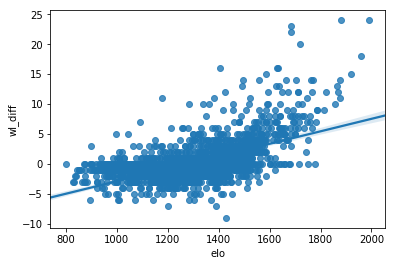

In [55]:
sb.regplot(x = 'elo', y = 'wl_diff', data = fighters, scatter = True)

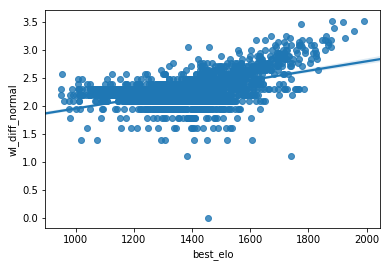

In [56]:
sb.regplot(x = 'best_elo', y = 'wl_diff_normal', data = fighters, scatter = True)

In [57]:
def remove_outlier(x):
    if x <= 1:
        x = fighters['wl_diff_normal'].mean()
    return x

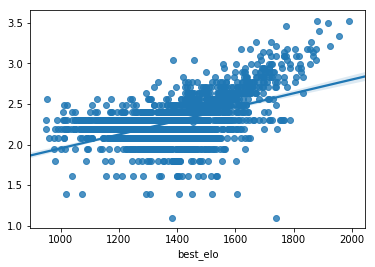

In [58]:
sb.regplot(x=fighters['best_elo'], y=[remove_outlier(x) for x in fighters['wl_diff_normal']], scatter = True)

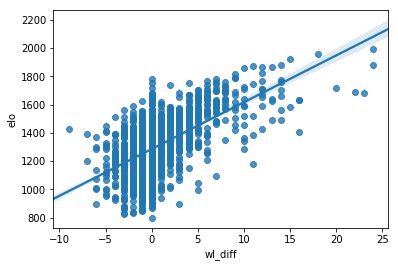

In [59]:
sb.regplot(x=fighters['wl_diff'], y=fighters['elo'], scatter=True)

In [60]:
f_ids = list(fights['f1_id'].append(fights['f2_id']))
len(f_ids)

9780

In [61]:
#f_ids.nunique()
missing = []
f_ids_fighters = list(fighters['id'])
for i in set(f_ids):
    if i not in f_ids_fighters:
        f_ids.remove(i)
        missing.append(i)
print(len(f_ids))
print(len(missing))
# 1517 fighters who've had fights in major promotions

9450
330


In [63]:
# remove fights w/ fighters not in database
for i in range(0, len(fights)):
    if fights.loc[i, 'f1_id'] in missing or fights.loc[i, 'f2_id'] in missing:
        fights = fights.drop(index = i)
fights = fights.reset_index()
len(fights)

4084

In [64]:
# number of events
fights['event_id'].nunique()

451

In [65]:
def expected_score(ratingA, ratingB, player):
    '''player must be A or B'''
    if player == 'A':
        return 1/(1+10**((ratingB-ratingA)/400))
    else:
        return 1/(1+10**((ratingA-ratingB)/400))

def update_elo(ratingA, ratingB, player, outcome):
    '''outcome True for win, False otherwise'''
    if outcome:
        return ratingA + 32*(1 - expected_score(ratingA, ratingB, player))
    else:
        return ratingA + 32*(0 - expected_score(ratingA, ratingB, player))

In [66]:
fighters.head(5)

,id,name,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,...,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo,wl_diff_normal
0,15df64c02b6b0fde,Danny Abbadi,71,155,75.0,3.29,38,4.41,57,0.00,...,77,0.0,0,2,-2,-2,986.39,1065.42,1127.24,2.079442
1,b361180739bed4b0,David Abbott,72,265,75.0,1.35,30,3.55,38,1.07,...,66,0.0,8,13,-5,-7,953.32,1155.81,1131.39,1.609438
2,2f5cbecbbe18bac4,Shamil Abdurakhimov,75,235,76.0,2.44,45,2.24,60,1.50,...,66,0.2,4,2,2,2,1500.20,1500.20,1209.79,2.484907
3,c0ed7b208197e8de,Hiroyuki Abe,66,145,75.0,1.71,36,3.11,63,0.00,...,33,0.0,0,1,-1,0,1216.15,1236.53,1093.63,2.197225
4,5140122c3eecd307,Daichi Abe,71,170,71.0,3.80,33,4.49,56,0.33,...,0,0.0,1,2,-1,-2,1230.65,1312.60,1186.18,2.197225


In [67]:
headings = ['id','name','id_opp','name_opp','event_id','event_name','elo','elo_opp','height_diff','reach_diff','ss_min_diff','str_acc_diff', 
            'str_a_min_diff','str_def_diff','td_avg_diff','td_acc_diff','td_def_diff','sub_avg_diff', 
            'wins_diff','losses_diff','momentum_diff','wl_diff_diff','outcome']
comp = pd.DataFrame.from_records([], columns = headings)

In [68]:
start_elo = 750

In [69]:
elos = {}
for i in range(len(fights)-1, 0, -1):
    ID = fights.loc[i, 'f1_id']
    name = fights.loc[i, 'f1_name']
    id_opp = fights.loc[i, 'f2_id']
    name_opp = fights.loc[i, 'f2_name']
    event_id = fights.loc[i, 'event_id']
    event_name = fights.loc[i, 'event_name']
    f1_data = fighters.loc[fighters['id'] == ID]
    f2_data = fighters.loc[fighters['id'] == id_opp]
    
    # determine current elo rating
    if ID not in list(comp['id']):
        elo = start_elo
    elif ID in elos.keys():
        elo = elos[ID]
    if id_opp not in list(comp['id'].append(comp['id_opp'])):
        elo_opp = start_elo
    elif id_opp in elos.keys():
        elo_opp = elos[id_opp]
    height_diff = f1_data['height'].values[0] - f2_data['height'].values[0]
    reach_diff = f1_data['reach'].values[0] - f2_data['reach'].values[0]
    ss_min_diff = f1_data['ss_min'].values[0] - f2_data['ss_min'].values[0]
    str_acc_diff = f1_data['str_acc'].values[0] - f2_data['str_acc'].values[0]
    str_a_min_diff = f1_data['str_a_min'].values[0] - f2_data['str_a_min'].values[0]
    str_def_diff = f1_data['str_def'].values[0] - f2_data['str_def'].values[0]
    td_avg_diff = f1_data['td_avg'].values[0] - f2_data['td_avg'].values[0]
    td_acc_diff = f1_data['td_acc'].values[0] - f2_data['td_acc'].values[0]
    td_def_diff = f1_data['td_def'].values[0] - f2_data['td_def'].values[0]
    sub_avg_diff = f1_data['sub_avg'].values[0] - f2_data['sub_avg'].values[0]
    wins_diff = f1_data['wins'].values[0] - f2_data['wins'].values[0]
    losses_diff = f1_data['losses'].values[0] - f2_data['losses'].values[0]
    momentum_diff = f1_data['momentum'].values[0] - f2_data['momentum'].values[0]
    wl_diff_diff = f1_data['wl_diff'].values[0] - f2_data['wl_diff'].values[0]
    if fights.loc[i, 'winner_id'] == ID:
        outcome = 'W'
        elos[ID] = update_elo(elo, elo_opp, 'A', True)
    else:
        outcome = 'L'
        elos[ID] = update_elo(elo, elo_opp, 'A', False)
    comp = comp.append([{'id':ID,'name':name,'id_opp':id_opp,'name_opp':name_opp,'event_id':event_id,'event_name':event_name,
                         'elo':elo,'elo_opp':elo_opp, 'height_diff':height_diff,'reach_diff':reach_diff,
                         'ss_min_diff':ss_min_diff,'str_acc_diff':str_acc_diff,'str_a_min_diff':str_a_min_diff,
                         'str_def_diff':str_def_diff,'td_avg_diff':td_avg_diff,'td_acc_diff':td_acc_diff,
                         'td_def_diff':td_def_diff,'sub_avg_diff':sub_avg_diff,'wins_diff':wins_diff,
                         'losses_diff':losses_diff,'momentum_diff':momentum_diff, 'wl_diff_diff':wl_diff_diff,'outcome':outcome}], 
                       ignore_index = True)
    comp = comp.append([{'id':id_opp,'name':name_opp,'id_opp':ID,'name_opp':name,'event_id':event_id,'event_name':event_name,
                         'elo':elo_opp,'elo_opp':elo, 'height_diff':-height_diff,'reach_diff':-reach_diff,
                         'ss_min_diff':-ss_min_diff,'str_acc_diff':-str_acc_diff,'str_a_min_diff':-str_a_min_diff,
                         'str_def_diff':-str_def_diff,'td_avg_diff':-td_avg_diff,'td_acc_diff':-td_acc_diff,
                         'td_def_diff':-td_def_diff,'sub_avg_diff':-sub_avg_diff,'wins_diff':-wins_diff,
                         'losses_diff':-losses_diff,'momentum_diff':-momentum_diff, 'wl_diff_diff':-wl_diff_diff,'outcome':'W' if outcome == 'L' else 'L'}],
                      ignore_index = True)

In [73]:
fdata = fighters.loc[fighters['id'] == '429e7d3725852ce9']

,id,name,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,...,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo,wl_diff_normal
690,429e7d3725852ce9,Royce Gracie,73,175,75.0,0.88,41,1.13,37,0.0,...,66,0.8,13,2,11,1,1383.03,1386.96,1159.52,3.044522


In [71]:
comp.sort_values('elo', ascending = False).head(100)

,id,name,id_opp,name_opp,event_id,event_name,elo,elo_opp,height_diff,reach_diff,...,str_def_diff,td_avg_diff,td_acc_diff,td_def_diff,sub_avg_diff,wins_diff,losses_diff,momentum_diff,wl_diff_diff,outcome
7671,492b202d2064e7a9,Fabricio Werdum,279566840aa55bf2,Alexander Volkov,eed2b71d77d95416,UFC Fight Night: Werdum vs. Volkov,1060.59,793.591,-3,-3.0,...,0,0.79,-45,-44,0.8,18,7,0,11,L
7843,55ed59d541f8b90c,Rolando Dy,4cd8b03aee1d0138,Shane Young,ac5f67109accb482,UFC Fight Night: Cowboy vs. Edwards,1059.56,830.81,0,-3.0,...,-1,-0.92,-13,4,-0.0,0,2,-2,-2,L
8005,546f8599a63c29da,Roberto Sanchez,81d9df19e255b8b6,Jarred Brooks,d5ae8074631762fc,UFC 228: Woodley vs. Till,1056.57,769.752,3,4.0,...,-16,-0.93,5,-19,0.1,-1,0,-2,-1,L
7390,492b202d2064e7a9,Fabricio Werdum,c9cf753cfdf77fc2,Marcin Tybura,caced97768818230,UFC Fight Night: Werdum vs. Tybura,1054.84,791.144,1,-1.0,...,4,0.04,-31,-48,1.0,18,5,-2,13,W
7392,55ed59d541f8b90c,Rolando Dy,2296125b6c362355,Wuliji Buren,e7bc606d269896aa,UFC Fight Night: Bisping vs. Gastelum,1054.84,750,-1,0.0,...,-9,-3.32,-20,-12,0.0,1,1,1,0,W
8052,cfb65863d5099327,Thales Leites,db1f2ed63b54b9a7,Hector Lombard,852454c572675334,UFC Fight Night: Marreta vs. Anders,1053.71,869.473,4,7.0,...,-1,0.41,-21,-47,0.6,10,-2,7,12,W
7731,cfb65863d5099327,Thales Leites,0a1942069c9ad6b6,Jack Hermansson,67ec58d7cf599835,UFC 224: Nunes vs. Pennington,1053.71,804.389,0,1.0,...,-11,0.11,-19,-39,0.8,9,6,0,3,L
7261,cfb65863d5099327,Thales Leites,0c6d9ea8306c029e,Brad Tavares,cc5834a495d1ea08,UFC 216: Ferguson vs. Lee,1053.71,910.156,0,4.0,...,-3,1.06,0,-47,1.1,1,3,2,-2,L
8007,3cf66c62d9069f43,Lucie Pudilova,578ef12674df1e6a,Irene Aldana,d5ae8074631762fc,UFC 228: Woodley vs. Till,1049.84,843.176,-1,-1.0,...,-8,-0.50,-50,-17,0.5,0,0,-3,0,L
7591,eef9b891edbd4604,Mark Hunt,fa6796c55d6c5440,Curtis Blaydes,15515e797aedc137,UFC 221: Romero vs. Rockhold,1048.55,784.108,-6,-8.0,...,-5,-6.29,-2,39,0.2,8,12,0,-4,L


In [74]:
comp.dtypes

id                 object
name               object
id_opp             object
name_opp           object
event_id           object
event_name         object
elo                object
elo_opp            object
height_diff        object
reach_diff        float64
ss_min_diff       float64
str_acc_diff       object
str_a_min_diff    float64
str_def_diff       object
td_avg_diff       float64
td_acc_diff        object
td_def_diff        object
sub_avg_diff      float64
wins_diff          object
losses_diff        object
momentum_diff      object
wl_diff_diff       object
outcome            object
dtype: object

In [75]:
comp['elo'] = comp.elo.astype(float)
comp['elo_opp'] = comp.elo_opp.astype(float)
comp['height_diff'] = comp.height_diff.astype(float)
comp['str_acc_diff'] = comp.str_acc_diff.astype(float)
comp['str_def_diff'] = comp.str_def_diff.astype(float)
comp['td_acc_diff'] = comp.td_acc_diff.astype(float)
comp['td_def_diff'] = comp.td_def_diff.astype(float)
comp['wins_diff'] = comp.wins_diff.astype(float)
comp['losses_diff'] = comp.losses_diff.astype(float)
comp['momentum_diff'] = comp.momentum_diff.astype(float)
comp['wl_diff_diff'] = comp.wl_diff_diff.astype(float)

In [98]:
comp

,Unnamed: 0,id,name,id_opp,name_opp,event_id,event_name,elo,elo_opp,height_diff,...,str_def_diff,td_avg_diff,td_acc_diff,td_def_diff,sub_avg_diff,wins_diff,losses_diff,momentum_diff,wl_diff_diff,outcome
0,0,429e7d3725852ce9,Royce Gracie,63b65af1c5cb02cb,Ken Shamrock,6420efac0578988b,UFC 1: The Beginning,750.000000,750.000000,0.0,...,-2.0,-0.94,-60.0,22.0,-1.7,5.0,-7.0,5.0,12.0,1
1,1,63b65af1c5cb02cb,Ken Shamrock,429e7d3725852ce9,Royce Gracie,6420efac0578988b,UFC 1: The Beginning,750.000000,750.000000,0.0,...,2.0,0.94,60.0,-22.0,1.7,-5.0,7.0,-5.0,-12.0,0
2,2,429e7d3725852ce9,Royce Gracie,08ae5cd9aef7ddd3,Kimo Leopoldo,1a49e0670dfaca31,UFC 3: The American Dream,766.000000,750.000000,-2.0,...,7.0,-4.55,-100.0,66.0,-1.5,10.0,-3.0,3.0,13.0,1
3,3,08ae5cd9aef7ddd3,Kimo Leopoldo,429e7d3725852ce9,Royce Gracie,1a49e0670dfaca31,UFC 3: The American Dream,750.000000,766.000000,2.0,...,-7.0,4.55,100.0,-66.0,1.5,-10.0,3.0,-3.0,-13.0,0
4,4,63b65af1c5cb02cb,Ken Shamrock,429e7d3725852ce9,Royce Gracie,dedc3bb440d09554,UFC 5: The Return of the Beast,766.000000,781.263693,0.0,...,2.0,0.94,60.0,-22.0,1.7,-5.0,7.0,-5.0,-12.0,1
5,5,429e7d3725852ce9,Royce Gracie,63b65af1c5cb02cb,Ken Shamrock,dedc3bb440d09554,UFC 5: The Return of the Beast,781.263693,766.000000,0.0,...,-2.0,-0.94,-60.0,22.0,-1.7,5.0,-7.0,5.0,12.0,0
6,6,63b65af1c5cb02cb,Ken Shamrock,08ae5cd9aef7ddd3,Kimo Leopoldo,b63e800c18e011b5,UFC 8: David vs Goliath,782.702467,781.263693,-2.0,...,9.0,-3.61,-40.0,44.0,0.2,5.0,4.0,-2.0,1.0,1
7,7,08ae5cd9aef7ddd3,Kimo Leopoldo,63b65af1c5cb02cb,Ken Shamrock,b63e800c18e011b5,UFC 8: David vs Goliath,781.263693,782.702467,2.0,...,-9.0,3.61,40.0,-44.0,-0.2,-5.0,-4.0,2.0,-1.0,0
8,8,271fe91f4ba9d2c5,Don Frye,fbbde91f7bc2d3c5,Gary Goodridge,b63e800c18e011b5,UFC 8: David vs Goliath,750.000000,750.000000,-2.0,...,-11.0,0.51,-43.0,-8.0,-0.1,-2.0,-11.0,-1.0,9.0,1
9,9,fbbde91f7bc2d3c5,Gary Goodridge,271fe91f4ba9d2c5,Don Frye,b63e800c18e011b5,UFC 8: David vs Goliath,750.000000,750.000000,2.0,...,11.0,-0.51,43.0,8.0,0.1,2.0,11.0,1.0,-9.0,0


In [77]:
comp['outcome'] = comp['outcome'].apply(lambda x: (1 if x == 'W' else 0))

In [79]:
comp.to_csv('data/composite-database.csv')

In [80]:
comp = pd.read_csv('data/composite-database.csv')

In [82]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 10 folds
    kf = KFold(n_splits=10, shuffle=False)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [83]:
predictors = ['elo','elo_opp','height_diff','reach_diff','ss_min_diff','str_acc_diff', 
            'str_a_min_diff','str_def_diff','td_avg_diff','td_acc_diff','td_def_diff','sub_avg_diff', 
            'wins_diff','losses_diff','momentum_diff','wl_diff_diff']
outcome = 'outcome'
classification_model(LogisticRegression(), comp, predictors, outcome)

c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 75.802%


c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\pyt

Cross-Validation Score : 75.092%


c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\patri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification_model(model, comp, predictors, outcome)

Accuracy : 100.000%
Cross-Validation Score : 66.752%


In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
classification_model(model, comp, predictors, outcome)

Accuracy : 99.914%
Cross-Validation Score : 76.378%


In [92]:
test = pd.read_csv('data/composite-test.csv')
train = pd.read_csv('data/composite-train.csv')
results = pd.read_csv('data/test-results.csv')

In [93]:
model.fit(train[predictors],train[outcome])
predictions = model.predict(train[predictors])
test[outcome] = model.predict(test[predictors])

In [94]:
test

,id,name,id_opp,name_opp,event_id,event_name,elo,elo_opp,height_diff,reach_diff,...,str_def_diff,td_avg_diff,td_acc_diff,td_def_diff,sub_avg_diff,wins_diff,losses_diff,momentum_diff,wl_diff_diff,outcome
0,6fb1ba67bef41b37,Nik Lentz,7d96bc577e5178b2,Gray Maynard,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,914.915814,924.800876,-1,-2,...,-17,0.59,-12,-37,0.6,2,-1,2,3,W
1,7d96bc577e5178b2,Gray Maynard,6fb1ba67bef41b37,Nik Lentz,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,924.800876,914.915814,1,2,...,17,-0.59,12,37,-0.6,-2,1,-2,-3,L
2,3143bf892608139a,Yana Kunitskaya,2eeaefbfc7f9fcff,Lina Lansberg,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,750.000000,781.263693,-1,3,...,-5,4.39,28,-33,0.6,-1,-2,2,1,L
3,2eeaefbfc7f9fcff,Lina Lansberg,3143bf892608139a,Yana Kunitskaya,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,781.263693,750.000000,1,-3,...,5,-4.39,-28,33,-0.6,1,2,-2,-1,W
4,d4691518d012b9e7,Aspen Ladd,b12a1d19ee383b7c,Tonya Evinger,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,766.736307,750.000000,-1,-4,...,-4,0.47,67,72,-1.4,2,-4,6,6,W
5,b12a1d19ee383b7c,Tonya Evinger,d4691518d012b9e7,Aspen Ladd,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,750.000000,766.736307,1,4,...,4,-0.47,-67,-72,1.4,-2,4,-6,-6,L
6,6d4b63c767106d3a,Vicente Luque,4d8fa64202cee4c1,Jalin Turner,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,938.765979,750.000000,-4,-2,...,12,-0.21,-50,61,1.0,7,1,4,6,W
7,4d8fa64202cee4c1,Jalin Turner,6d4b63c767106d3a,Vicente Luque,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,750.000000,938.765979,4,2,...,-12,0.21,50,-61,-1.0,-7,-1,-4,-6,L
8,eb04b9d31e938edb,Michelle Waterson,b6850671a008bf9a,Felice Herrig,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,784.806823,813.332431,-1,-3,...,1,1.03,38,-14,0.5,1,-1,4,2,W
9,b6850671a008bf9a,Felice Herrig,eb04b9d31e938edb,Michelle Waterson,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,813.332431,784.806823,1,3,...,-1,-1.03,-38,14,-0.5,-1,1,-4,-2,L


In [95]:
test['outcome'].value_counts()

W    47
L    45
Name: outcome, dtype: int64

In [96]:
results

,id,name,id_opp,name_opp,event_id,event_name,elo,elo_opp,height_diff,reach_diff,...,str_def_diff,td_avg_diff,td_acc_diff,td_def_diff,sub_avg_diff,wins_diff,losses_diff,momentum_diff,wl_diff_diff,outcome
0,6fb1ba67bef41b37,Nik Lentz,7d96bc577e5178b2,Gray Maynard,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,914.915814,924.800876,-1,-2,...,-17,0.59,-12,-37,0.6,2,-1,2,3,W
1,7d96bc577e5178b2,Gray Maynard,6fb1ba67bef41b37,Nik Lentz,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,924.800876,914.915814,1,2,...,17,-0.59,12,37,-0.6,-2,1,-2,-3,L
2,3143bf892608139a,Yana Kunitskaya,2eeaefbfc7f9fcff,Lina Lansberg,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,750.000000,781.263693,-1,3,...,-5,4.39,28,-33,0.6,-1,-2,2,1,W
3,2eeaefbfc7f9fcff,Lina Lansberg,3143bf892608139a,Yana Kunitskaya,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,781.263693,750.000000,1,-3,...,5,-4.39,-28,33,-0.6,1,2,-2,-1,L
4,d4691518d012b9e7,Aspen Ladd,b12a1d19ee383b7c,Tonya Evinger,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,766.736307,750.000000,-1,-4,...,-4,0.47,67,72,-1.4,2,-4,6,6,W
5,b12a1d19ee383b7c,Tonya Evinger,d4691518d012b9e7,Aspen Ladd,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,750.000000,766.736307,1,4,...,4,-0.47,-67,-72,1.4,-2,4,-6,-6,L
6,6d4b63c767106d3a,Vicente Luque,4d8fa64202cee4c1,Jalin Turner,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,938.765979,750.000000,-4,-2,...,12,-0.21,-50,61,1.0,7,1,4,6,W
7,4d8fa64202cee4c1,Jalin Turner,6d4b63c767106d3a,Vicente Luque,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,750.000000,938.765979,4,2,...,-12,0.21,50,-61,-1.0,-7,-1,-4,-6,L
8,eb04b9d31e938edb,Michelle Waterson,b6850671a008bf9a,Felice Herrig,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,784.806823,813.332431,-1,-3,...,1,1.03,38,-14,0.5,1,-1,4,2,W
9,b6850671a008bf9a,Felice Herrig,eb04b9d31e938edb,Michelle Waterson,1ef0eae31904e534,UFC 229: Khabib vs. McGregor,813.332431,784.806823,1,3,...,-1,-1.03,-38,14,-0.5,-1,1,-4,-2,L


In [97]:
score = 0
total = len(results)
for i in range(0, total):
    if results.loc[i, 'outcome'] == test.loc[i, 'outcome']:
        score += 1
print('Prediction rate is ' + str(round((score*100/total),2)) + '%')

Prediction rate is 88.04%
